## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how="outer", on ="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.
study_group = combined_data['Mouse ID'].unique()
len(study_group)

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
fullmouse= combined_data.loc[combined_data["Mouse ID"] == "g989"]
fullmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleandata = combined_data.loc[combined_data["Mouse ID"] != "g989"]
cleandata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice in the clean DataFrame.
cleandata1= cleandata['Mouse ID'].unique()
len(cleandata1)


248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
r_mean = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
r_median = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
r_var = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
r_std = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
r_sem = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats = pd.DataFrame({
    "Mean" : r_mean,
    "Median":r_median,
    "Variance":r_var,
    "Std Dev":r_std,
    "Sem":r_sem
})
stats




,Mean,Median,Variance,Std Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#cleandata.agg(['sum','mean','median', 'var', 'std', 'sem'])
indexed =cleandata.set_index("Drug Regimen")
indexed.agg(['sum','mean','median', 'var', 'std', 'sem'])

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
sum,k403k403k403k403k403k403k403k403k403k403s185s1...,MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemale...,23985.000000,48241.000000,36860.000000,94818.351277,1927.000000
mean,NaN,NaN,12.757979,25.660106,19.606383,50.435293,1.025000
median,NaN,NaN,13.000000,27.000000,20.000000,48.933454,1.000000
var,NaN,NaN,51.581096,15.484730,198.647538,79.462907,1.299534
std,NaN,NaN,7.181998,3.935064,14.094238,8.914197,1.139971
sem,NaN,NaN,0.165640,0.090755,0.325059,0.205591,0.026291


## Bar and Pie Charts

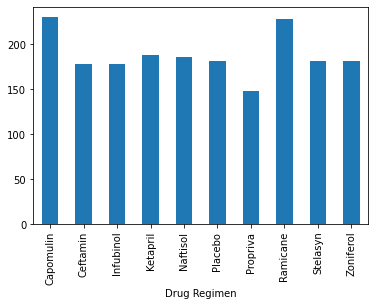

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure = cleandata.groupby("Drug Regimen")["Mouse ID"].count()
measure.plot(kind='bar')





<BarContainer object of 10 artists>

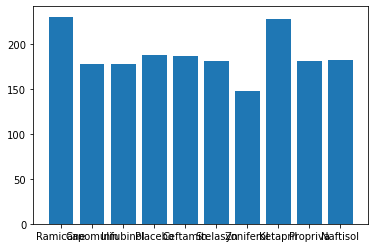

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#y_axis= np.arrange(len(cleandata["Mouse ID"])
measure = cleandata.groupby("Drug Regimen")["Mouse ID"].count()
plt.bar(cleandata["Drug Regimen"].unique(),measure)

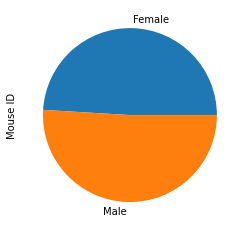

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleandata.groupby("Sex").count()["Mouse ID"]
gender_count.plot(kind="pie")



([<matplotlib.patches.Wedge at 0x254719c00b8>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

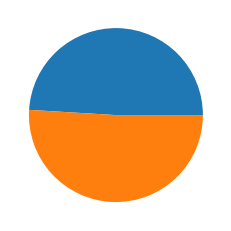

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = cleandata.groupby("Sex").count()["Mouse ID"]
plt.pie(gender_count)

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_mouse = cleandata.groupby("Mouse ID")["Timepoint"].max()
time_mouse.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleandata_2 =cleandata.merge(time_mouse,how="right", on=["Mouse ID","Timepoint"])


In [52]:
# Put treatments into a list for a for loop (and later for plot labels)
drug_list= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_emp= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in drug_list:
    #print(drug)
    quartiles=  cleandata_2.loc[cleandata_2["Drug Regimen"]== drug].quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25,"Tumor Volume (mm3)"]
    upperq = quartiles.loc[0.75,"Tumor Volume (mm3)"]
    iqr = upperq-lowerq
    tum_emp.append(cleandata_2.loc[cleandata_2["Drug Regimen"]== drug])
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #outliers= cleandata_2.loc[(cleandata_2["Tumor Volume (mm3)"]<lower_bound)|(cleandata_2["Tumor Volume (mm3)"]>upper_bound)]
    #print(f"{drug}'s potential outliers: {outliers}")
    #print(lower_bound,upper_bound)
tum_emp

#lowerq
#quartiles


[    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 1       s185    Capomulin  Female           3          17         45   
 2       x401    Capomulin  Female          16          15         45   
 3       m601    Capomulin    Male          22          17         45   
 6       f966    Capomulin    Male          16          17         20   
 10      u364    Capomulin    Male          18          17         45   
 12      y793    Capomulin    Male          17          17         45   
 13      r554    Capomulin  Female           8          17         45   
 14      m957    Capomulin  Female           3          19         45   
 16      t565    Capomulin  Female          20          17         45   
 20      i738    Capomulin  Female          23          20         45   
 22      w914    Capomulin    Male          24          21         45   
 24      g288    Capomulin    Male           3          19         45   
 28      l897    Capomulin    Male          17     

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tum_emp.reset_index
fix1,ax1 = plt.subplots()
tvolcap= tum_emp[tum_emp["Drug Regimen"]== "Capomulin"]
ax1.boxplot(tvolcap)

#plt.box(tum_emp["Drug Regimen"], tum_emp["Tumor Volume (mm3)"])
#tum_emp("Drug Regimen")

AttributeError: 'list' object has no attribute 'reset_index'

## Line and Scatter Plots

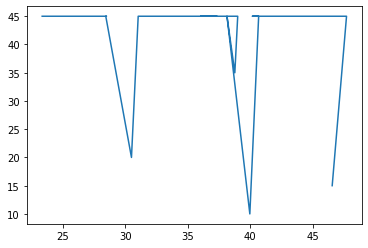

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_data=cleandata_2.loc[cleandata_2["Drug Regimen"]== "Capomulin"]
time_cap= cap_data["Tumor Volume (mm3)"]
t_vol= cap_data["Timepoint"]
plt.plot(time_cap,t_vol)



In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight= cap_data["Weight (g)"]
avg_tum= cap_data["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight,avg_tum)


36.667567719199994

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
